# Autoencoders in Keras

* [A Tutorial on Deep Learning PDF](http://ai.stanford.edu/~quocle/tutorial2.pdf)

In [1]:
%pylab inline
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG, Image

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Data 

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32')/255.
train_y = train_y.astype('float32')
test_x = test_x.astype('float32')/255.
test_y = test_y.astype('float32')

print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)
print('Test x Shape:', test_x.shape)
print('Test y Shape:', test_y.shape)

# Reshape
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:]))) # (60000, 28*28=784))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:]))) # (60000, 28*28=784))


print('\n[After Reshaping]')
print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)
print('Test x Shape:', test_x.shape)
print('Test y Shape:', test_y.shape)

Train x Shape: (60000, 28, 28)
Train y Shape: (60000,)
Test x Shape: (10000, 28, 28)
Test y Shape: (10000,)

[After Reshaping]
Train x Shape: (60000, 784)
Train y Shape: (60000,)
Test x Shape: (10000, 784)
Test y Shape: (10000,)


### Autoencoder Model

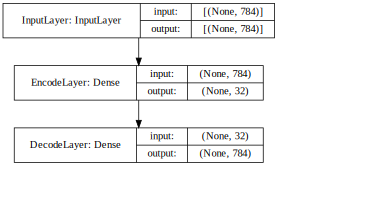

In [44]:
encoding_dim = 32  

input_img = Input(shape=(784,), name='InputLayer')
encoded = Dense(encoding_dim, activation='relu', name='EncodeLayer')(input_img)
decoded = Dense(784, activation='sigmoid', name='DecodeLayer')(encoded)

# Input -> Recontruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

### Encoder Model

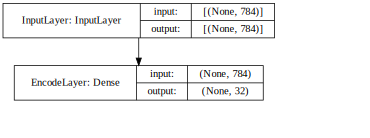

In [45]:
# Input Image -> Encoded 
encoder = Model(input_img, encoded, name='Input2')
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

### Decoder Model

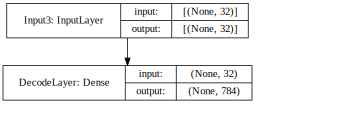

In [46]:
encoded_input = Input(shape=(encoding_dim,), name='Input3')
decoded_layer = autoencoder.layers[-1] # 마지막 layer를 꺼내옴
decoder = Model(encoded_input, decoded_layer(encoded_input))
SVG(model_to_dot(decoder, show_shapes=True).create(prog='dot', format='svg'))

### Training

In [47]:
autoencoder.fit(train_x, train_x, epochs=1, 
                batch_size=256, 
                shuffle=True,
                validation_data=(test_x, test_x), 
                verbose=1)

235/235 [==============================] - 2s 5ms/step - loss: 0.3826 - val_loss: 0.1872


### Predict

In [48]:
encoded_images = encoder.predict(test_x)
decoded_images = decoder.predict(encoded_images)

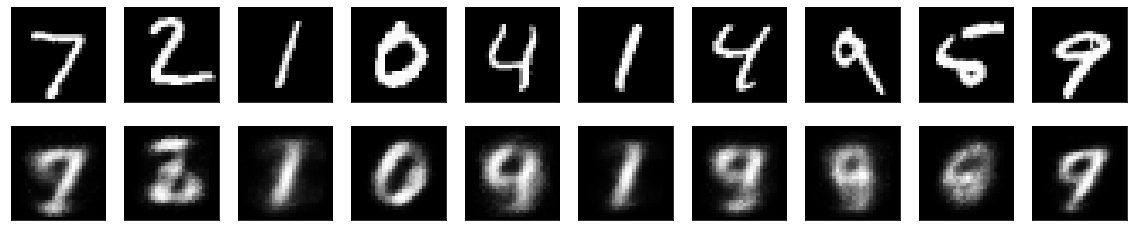

In [49]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()